## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;  descripe
- вивести розмірність датасету shape
- перевірити типи змінних і кількість данних по кожній змінній. 

In [13]:
dataset = pd.read_csv('titanic.csv') 

print(dataset.describe())
print(dataset.shape)
print(dataset.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890

З наявних даних видно наступне:
1. У даних числиться 891 пасажир.
2. Близько половини пасажирів не вижили під час катастрофи, оскільки лише 38.4% з них вціліли.
3. Приблизно 55.1% пасажирів подорожували у третьому класі, за ними пасажири другого класу - 20.7 і 24.2% подорожувала першим класом.
4. Середній вік пасажирів приблизно складає 29.7 року.
5. Більшість пасажирів подорожували одні, оскільки медіана SibSp та Parch дорiвнює нулю.
6. Приблизно 32.20 фунтів стерлінгів - середня ціна квитка.
7. Під час аналізу даних про порт посадки Embarked було виявлено два пропуски значень.

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [12]:
null_velue = dataset.isnull().sum()

print(null_velue)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


1. Можна помітити, що у 177 пасажирів відсутні значення для ознаки "Вік"
2. Важлива ознака "Cabin" (687) має велику кількість пропущених значень.
3. Для ознаки "Embarked", яка вказує на порт посадки, також є два пропущені значення. 

***Завдання 3:*** Побудувати матрицю кореляції 

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти
3. Описати отримані результати, спираючись на значення коефіціентів кореляції

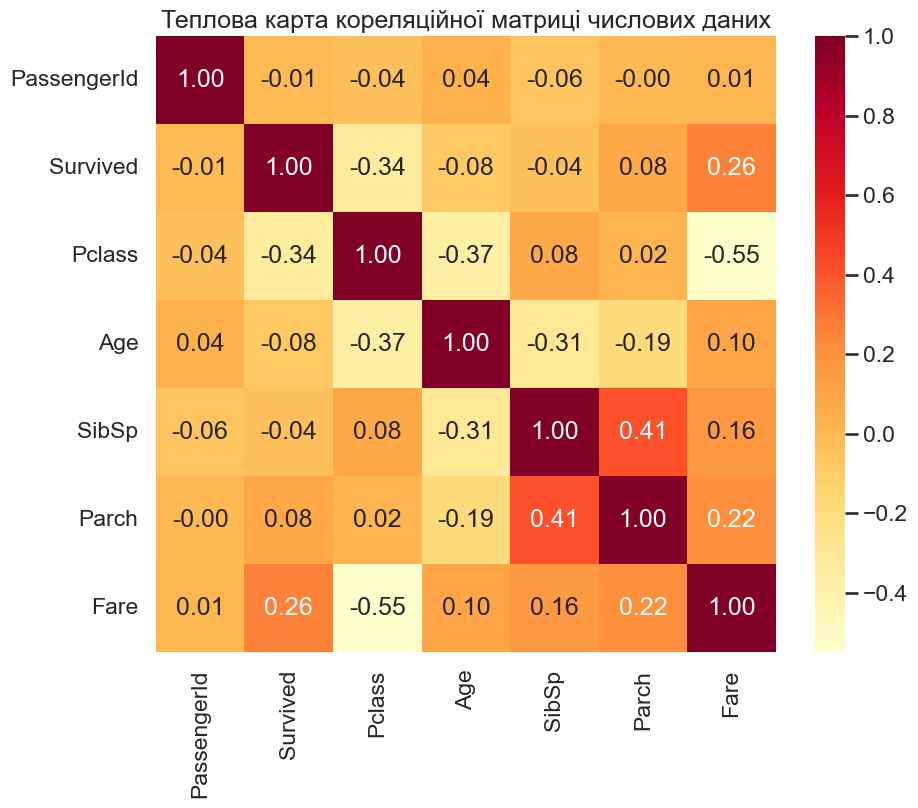

In [13]:
num_dataset = dataset.select_dtypes(include=[np.number])

correlation_matrix = num_dataset.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Теплова карта кореляційної матриці числових даних')
plt.show()

Висновки: Це теплова карта кореляційної матриці числових даних, яка візуалізує взаємозв'язок між різними числовими ознаками.
1. Яскраві кольори, свідчать про високу кореляцію між відповідними ознаками, тоді як білі або бліді кольори свідчать про відсутність чи слабку кореляцію.
2. Чим темніше кольори, тим вище кореляція між відповідними ознаками.
3. Значення, які близькі до 1 або -1 показують сильну лінійну залежність між ознаками.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [27]:
dataset = pd.read_csv('titanic.csv')


def fill_values(dataset, target_column, grouping_columns):
    dataset_filled = dataset.copy()
    dataset_filled[target_column] = dataset_filled.groupby(grouping_columns)[target_column].transform(lambda x: x.fillna(x.median()))

    if dataset_filled[target_column].isnull().any():
        dataset_filled[target_column].fillna(dataset_filled[target_column].median(), inplace=True)
    
    return dataset_filled


dataset = pd.read_csv('titanic.csv')
dataset_filled = fill_values(dataset, 'Age', ['Pclass', 'Sex'])

print(f"Пропущені значення у 'Age' після обробки: {dataset_filled['Age'].isnull().sum()}")

dataset_filled.to_csv('titanic.csv', index=False)

print("Оновлений датасет було успішно збережено.")

Пропущені значення у 'Age' після обробки: 0
Оновлений датасет було успішно збережено.


Висновки:

1. У датасеті Titanic було виявлено пропущені значення в стовпці Age.
2. Для заповнення цих пропущених значень було застосовано метод заповнення медіаною в залежності від групування за стовпцями Pclass (клас пасажира) та Sex (стать пасажира).
3. Після обробки пропущених значень за допомогою заповнення медіаною за групами в стовпці Age, жодного пропущеного значення не залишилося.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





/var/folders/pk/_9jfkx9s3_93slg6pbvr54qr0000gn/T/ipykernel_32006/1817847128.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_counts = dataset_filled.groupby('Age_bin')['Survived'].sum()


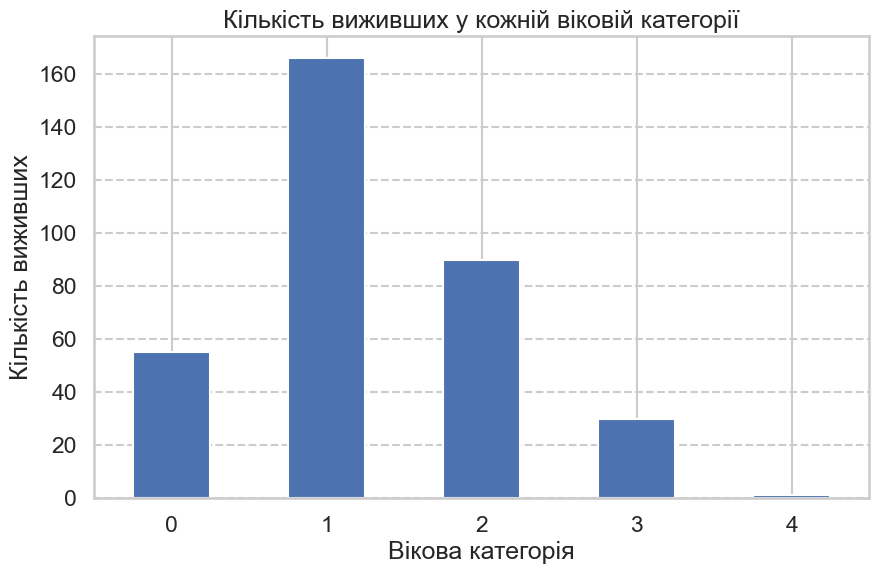

In [20]:
dataset_filled['Age_bin'] = pd.cut(dataset_filled['Age'], bins=[0, 16, 32, 48, 64, 80], labels=[0, 1, 2, 3, 4])

survived_counts = dataset_filled.groupby('Age_bin')['Survived'].sum()

plt.figure(figsize=(10, 6))
survived_counts.plot(kind='bar')
plt.title('Кількість виживших у кожній віковій категорії')
plt.xlabel('Вікова категорія')
plt.ylabel('Кількість виживших')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

На графіку показано, що люди з вікової категорії 1 найбільше вижило, ніж інші вікові групи. Вікова категорія 2 також має відносно високий рівень виживання. Проте категорії 0, 3 і 4 показують менше виживших, особливо категорія 4, де виживання найнижче. 

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

Fare_bin
0     44
1     68
2    101
3    129
Name: Survived, dtype: int64


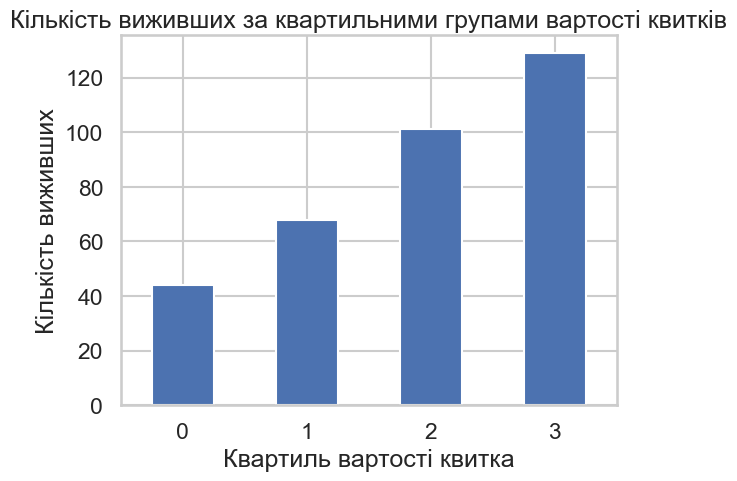

In [25]:
dataset['Fare_bin'] = pd.qcut(dataset['Fare'], 4, labels=False)

survival_by_fare = dataset.groupby('Fare_bin')['Survived'].sum()

print(survival_by_fare)

survival_by_fare.plot(kind='bar')
plt.title('Кількість виживших за квартильними групами вартості квитків')
plt.xlabel('Квартиль вартості квитка')
plt.ylabel('Кількість виживших')
plt.xticks(rotation=0)
plt.show()

1. Квитки були розділені на 4 групи за допомогою квартильного поділу, щоб класифікувати пасажирів за вартістю квитків.
2. Після цього було підраховано кількість виживших у кожній з цих груп.
3. Кількість виживших залежить від вартості квитка,так як це показують результати. Зокрема, пасажири з найвищою вартістю квитка (група 3) мали найбільшу ймовірність виживання.
4. Багаті пасажири мали більші шанси на виживання через доступ до кращих умов та підвищений пріоритет при евакуації.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

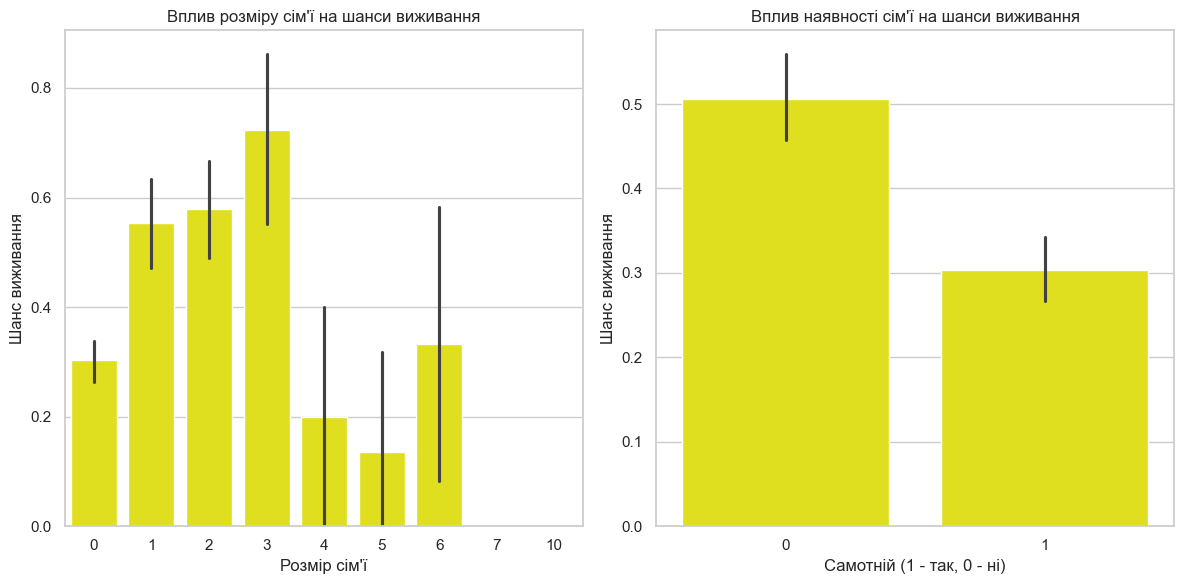

In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Family_size', y='Survived', data=dataset, color='yellow')
plt.title('Вплив розміру сім\'ї на шанси виживання')
plt.xlabel('Розмір сім\'ї')
plt.ylabel('Шанс виживання')

plt.subplot(1, 2, 2)
sns.barplot(x='Alone', y='Survived', data=dataset, color='yellow')
plt.title('Вплив наявності сім\'ї на шанси виживання')
plt.xlabel('Самотній (1 - так, 0 - ні)')
plt.ylabel('Шанс виживання')

plt.tight_layout() 
plt.show()



1. Пасажири з невеликою сім'єю мали вищі шанси на виживання порівняно з пасажирами, у яких сім'я була більшою або, навпаки, зовсім відсутня.

2. Це може вказувати на те, що великі сім'ї можуть мати більше труднощів під час евакуації або, можливо, більша кількість членів сім'ї знижує шанси на доступ до шлюпок порятунку.

3. Враховуючи це, планування евакуаційних заходів може виявитися критично важливим для забезпечення безпеки всіх пасажирів, незалежно від розміру їхньої сім'ї.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [18]:
dataset_cleaned = dataset.drop('Cabin', axis=1)
dataset_cleaned.to_csv('titani.csv', index=False)

1. Під час очищення даних з колонкою "Cabin", вона була успішно видалена з датасету.
2. Очищений датасет був збережений з назвою "titanic.csv".
3. Видалення колонки "Cabin" допомогло зменшити розмір датасету та покращити його зручність для подальшого аналізу та обробки.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [36]:
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('titanic.csv')

le = LabelEncoder()

dataset['Sex_encoded'] = le.fit_transform(dataset['Sex'])
dataset['Embarked_encoded'] = le.fit_transform(dataset['Embarked'].astype(str))
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
dataset['Title_encoded'] = le.fit_transform(dataset['Title'])

print(dataset.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_encoded  \
0      0         A/5 21171   7.2500   NaN        S            1   
1      0          PC 17599  71.2833   C85        C            0   
2      0  STON/O2. 3101282   7.9250   NaN        S            0   
3      0            113803  53.1000  C123        S  

Ваші висновки: Цей код перетворює категоріальні змінні 'Sex', 'Embarked' і 'Title' у числові для подальшого використання у моделюванні. Наприклад, замість слів 'male' або 'female' у стовпці 'Sex', тепер будуть числа 0 або 1. Така перетворення допомагає моделям зрозуміти та працювати з цими даними.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



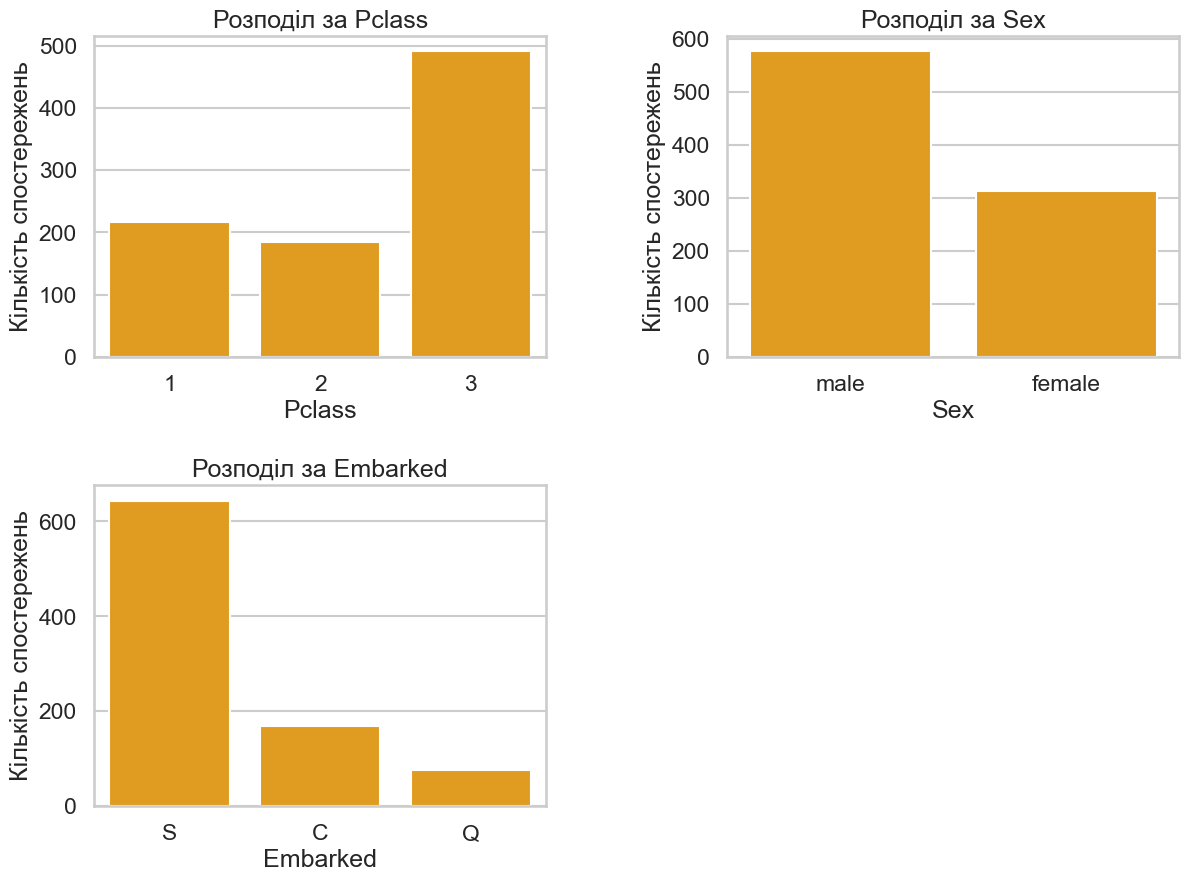

In [8]:
categorical_vars = ['Pclass', 'Sex', 'Embarked']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  

for i, var in enumerate(categorical_vars):
    ax = axes[i//2, i%2]
    sns.countplot(data=dataset, x=var,  color='orange',  ax=ax)
    ax.set_title(f'Розподіл за {var}')
    ax.set_ylabel('Кількість спостережень')
    ax.set_xlabel(var)

fig.delaxes(axes[1, 1])


plt.show()

Висновки:

1. За змінною Pclass ми бачимо розподіл пасажирів за класами. Найбільше число пасажирів припадає на третій клас.
2. За змінною Sex ми спостерігаємо розподіл пасажирів за статтю. Кількість чоловіків узагальнено перевищує кількість жінок на борту.
3. За змінною Embarked ми бачимо розподіл пасажирів за портами посадки. Більшість пасажирів посадилися у порту Southampton.

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

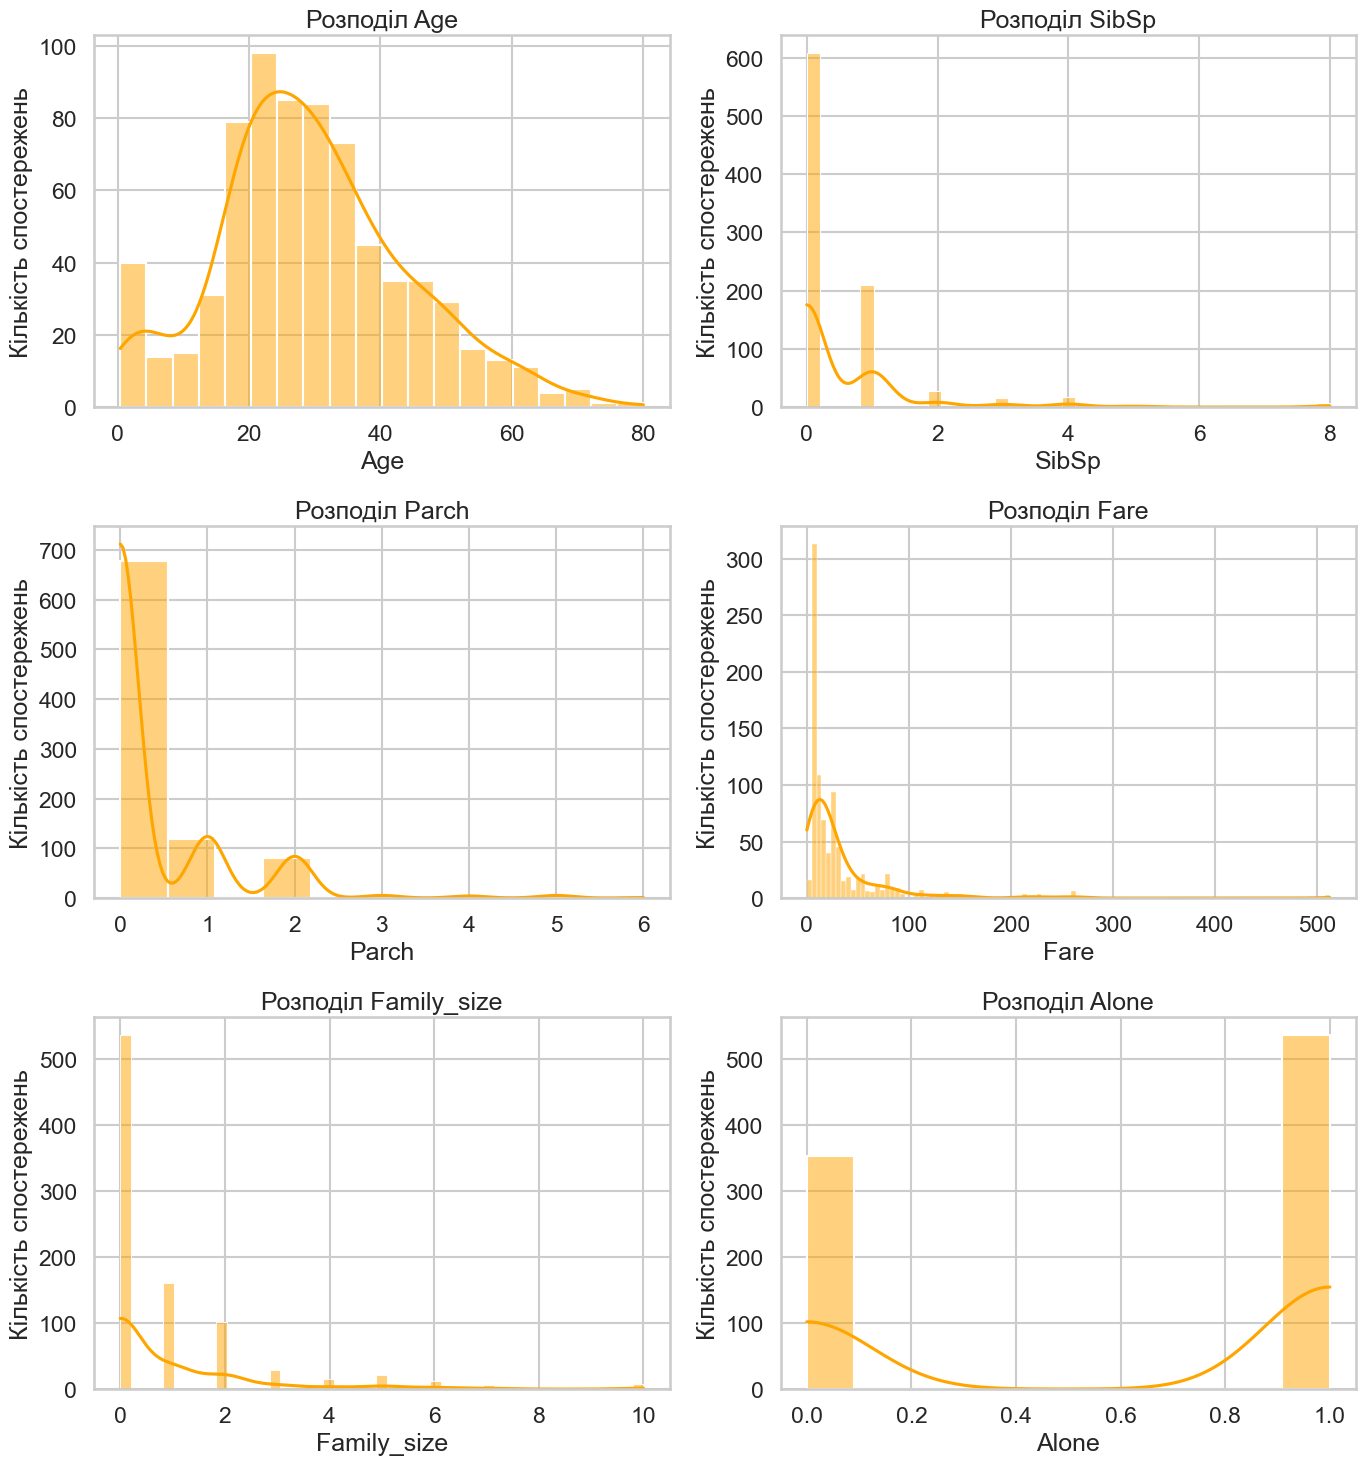

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset['Family_size'] = dataset['SibSp'] + dataset['Parch']
dataset['Alone'] = (dataset['Family_size'] == 0).astype(int)

numeric_vars = ['Age', 'SibSp', 'Parch', 'Fare', 'Family_size', 'Alone']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))
fig.subplots_adjust(hspace=0.3, wspace=0.3) 

for i, var in enumerate(numeric_vars):
    ax = axes[i//2, i%2]
    sns.histplot(dataset[var], kde=True, color='orange', ax=ax)
    ax.set_title(f'Розподіл {var}')
    ax.set_ylabel('Кількість спостережень')
    ax.set_xlabel(var)

if len(numeric_vars) % 2 != 0:
    fig.delaxes(axes[len(numeric_vars)//2, len(numeric_vars)%2])


plt.tight_layout()
plt.show()


Висновки:

1. Графіки розподілу числових змінних дозволяють нам отримати уявлення про розподіл значень цих змінних у датасеті.
2. За допомогою гістограм та ядерних оцінок щільності ми можемо оцінити форму розподілу кожної числової змінної.
3. Для змінних Age, SibSp, Parch, Fare ми спостерігаємо розподіл значень, який може бути правильно або нормально розподіленим. 
4. Змінна Family_size була обчислена як сума змінних SibSp та Parch, і ми бачимо, що розподіл цієї змінної також схожий на правильний розподіл.
5. Змінна Alone вказує, чи пасажир подорожував в одиночку. Це бінарна змінна, і ми бачимо розподіл між пасажирами, які подорожували в одиночку та тими, хто мав сім'ю.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати
можливі варіанти різних діаграм
boxplot or 

Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.